<a href="https://colab.research.google.com/github/shirsh12/Human-Activity-Recognition-Using-Smartphones/blob/main/Project_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HUMAN ACTIVITY RECOGNITION USING SMARTPHONES

#### Context 

Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data.

Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting. They may also be more focused activities such as those types of activities performed in a kitchen or on a factory floor.

The sensor data is recorded directly on the subject such as by smart phones that have accelerometers and gyroscopes.

#### Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

#### The activities are as follows:

Walking, 
Walking_upstairs, 
Walking_downstairs, 
Standing, 
Sitting, 
Laying

**Accelerometer**:
            An accelerometer is an electromechanical device used to measure acceleration forces. Such forces may be static, like the continuous force of gravity or, as is the case with many mobile devices, dynamic to sense movement or vibrations.bold text


**Gyroscope**:
         is a device used for measuring or maintaining orientation and angular velocity.

### Content
1. Data Science Life Cycle
2. Import and Understand the Data
3. Exploratory Data Analysis 
4. Data Prepration
5. Reducing the features - PCA 
6. Statistical algorithms 
7. Tree based algorithms
8. Deep learning algorithms
9. Hyper Parameter tuning 
10. More Evaluation Parameters 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import and Understand the Data

In [2]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
#import the train dataset

train_data=pd.read_csv("/content/drive/MyDrive/dat/train.csv")

In [4]:
# Lets look at glimpse of the data

train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [5]:
# Shape

train_data.shape

(7352, 563)

In [6]:
#Check the null values 
train_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [7]:
train_data.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

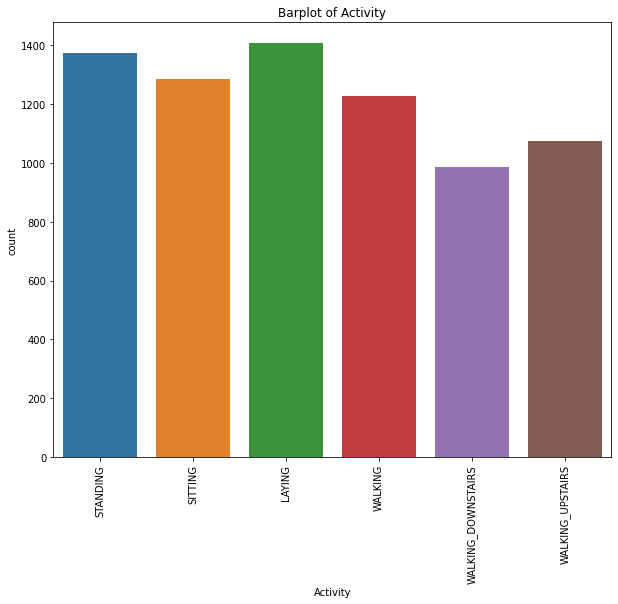

In [8]:
#checking if there is any imbalance data 
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train_data.Activity)
plt.xticks(rotation=90)

In [9]:
#importing the test data set
test_data=pd.read_csv("/content/drive/MyDrive/dat/test.csv")

In [10]:
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [11]:
test_data.shape

(2947, 563)

In [12]:
#Checking the null values
test_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [13]:
test_data.Activity.value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6ceb6f4b90>,
 [Text(0.9246289077905214, 0.5958702735311667, 'LAYING'),
  Text(-0.15485784087840757, 1.089045017030278, 'SITTING'),
  Text(-1.0393322592014753, 0.3602616479493165, 'STANDING'),
  Text(-0.8280699520170185, -0.7240857370274139, 'WALKING'),
  Text(0.18960134430378683, -1.0835364923426423, 'WALKING_DOWNSTAIRS'),
  Text(0.9915739703260872, -0.4762153518858462, 'WALKING_UPSTAIRS')],
 [Text(0.5043430406130116, 0.3250201491988182, '18.22'),
  Text(-0.08446791320640411, 0.5940245547437878, '18.05'),
  Text(-0.5669085050189865, 0.1965063534268999, '16.83'),
  Text(-0.45167451928201, -0.3949558565604075, '16.66'),
  Text(0.10341891507479281, -0.5910199049141684, '15.98'),
  Text(0.5408585292687748, -0.2597538283013706, '14.25')])

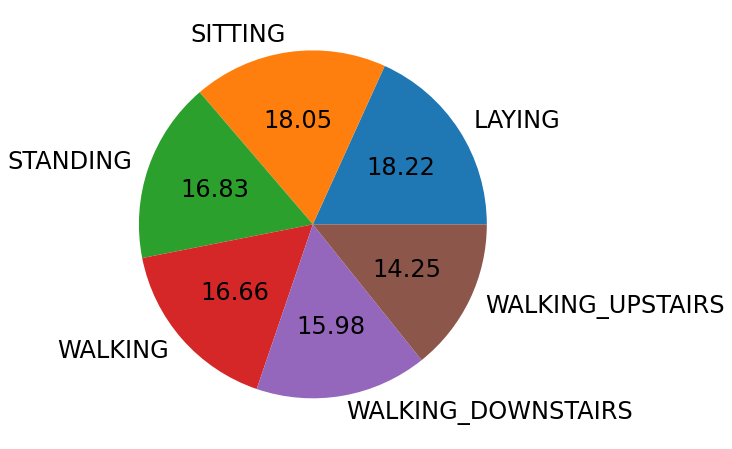

In [14]:
count_of_each_activity = np.array(test_data.Activity.value_counts())
activities = sorted(test_data.Activity.unique())


# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [8, 8], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

##  Exploratory Data Analysis

### Uni variate analysis

In [15]:
train_data.describe()
#we can observe 
# 1) that  the maximum value and the minimum values are 1.000000 and -1.000000 respectively
# 2) In most of the variables the mean and the mode are approximately equal which implies the data is normally distributed

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.

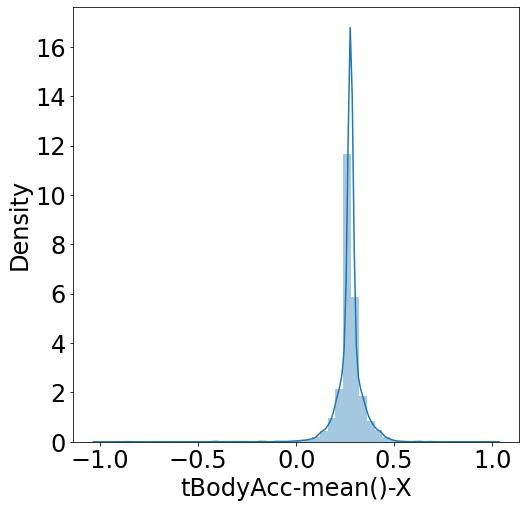

In [16]:
#Distrtibution plot of one of the mean vaiables tBodyAcc

sns.distplot(train_data['tBodyAcc-mean()-X']);

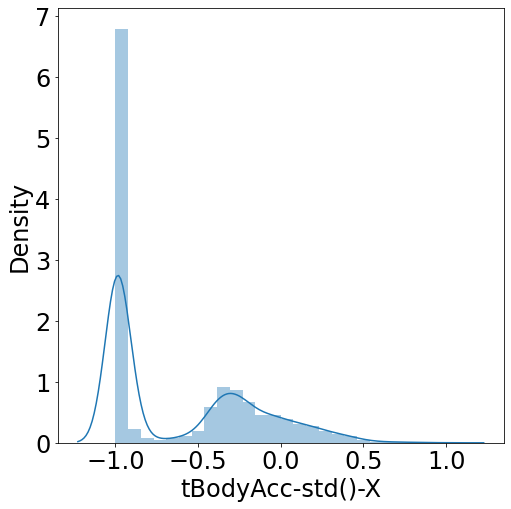

In [17]:
#distplot of one of the std variables

sns.distplot(train_data['tBodyAcc-std()-X'])

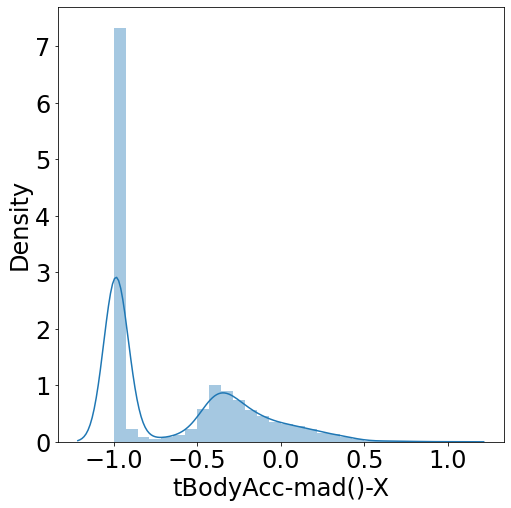

In [18]:
#distplot of one of the mode variables 

sns.distplot(train_data['tBodyAcc-mad()-X'])

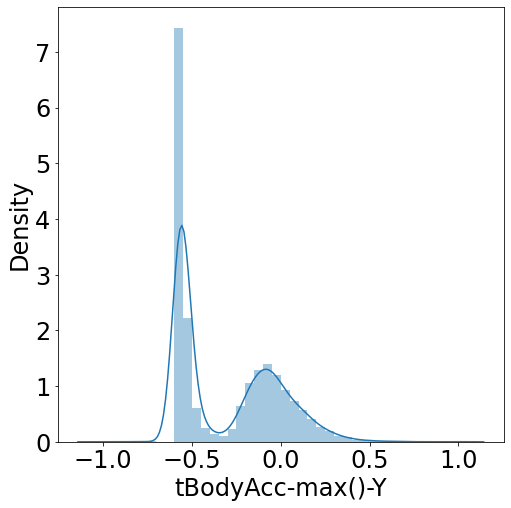

In [19]:
#distplot of one of the max variables
sns.distplot(train_data['tBodyAcc-max()-Y'])

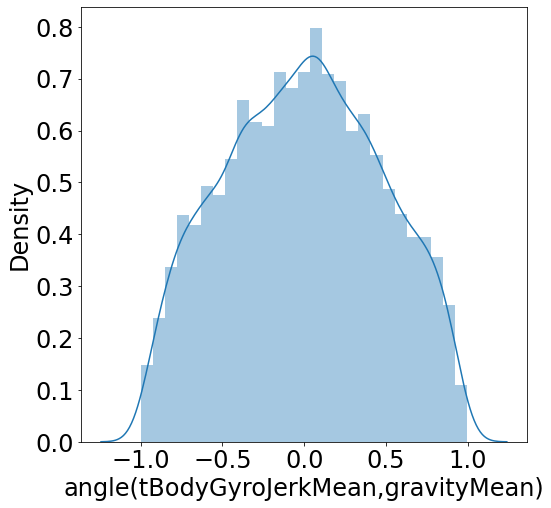

In [20]:
#distplot for one of the gyroscope varaible
sns.distplot(train_data['angle(tBodyGyroJerkMean,gravityMean)'])

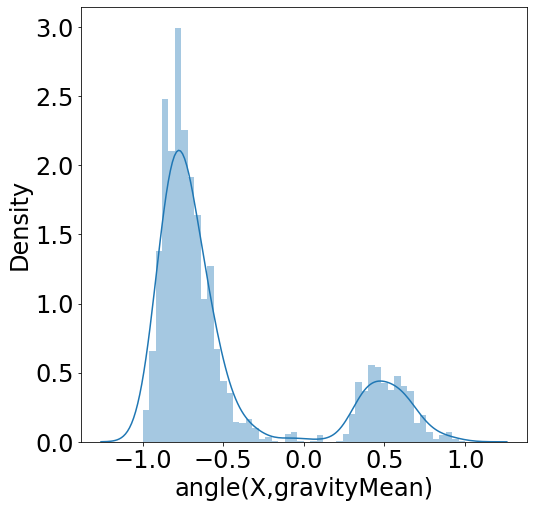

In [21]:
sns.distplot(train_data['angle(X,gravityMean)'])

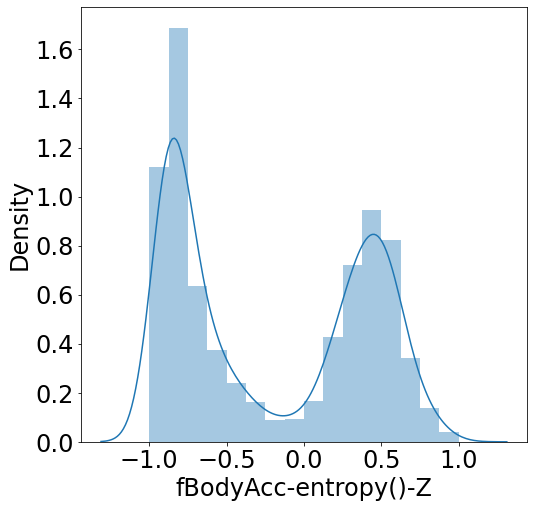

In [22]:
sns.distplot(train_data['fBodyAcc-entropy()-Z'])

### Bi variate analysis

Text(0.1, 9, 'Dynamic')

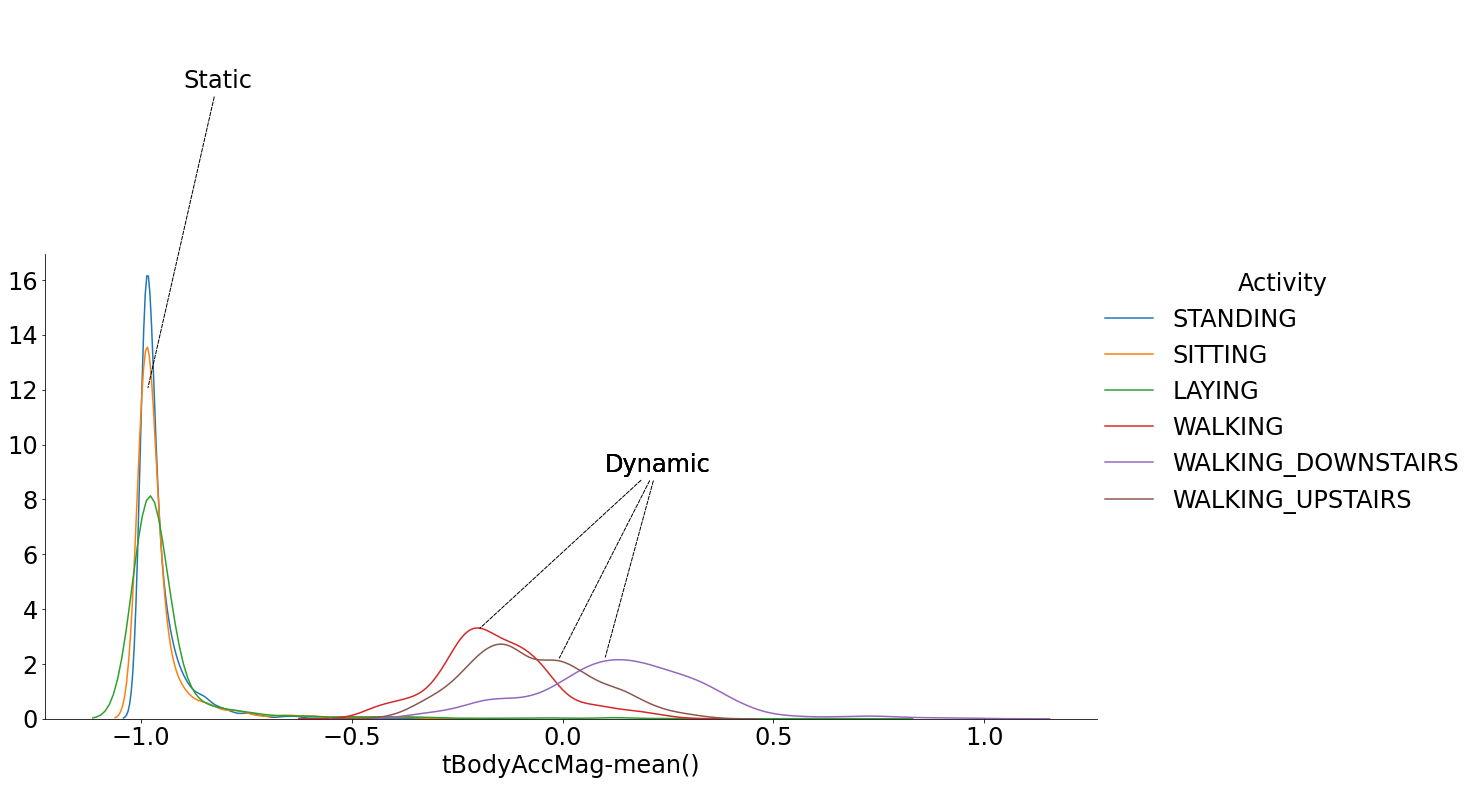

In [23]:
# Plot of acceleration vs different activities

facetgrid = sns.FacetGrid(train_data, hue='Activity', height=8,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Static", xy=(-.996,21), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static", xy=(-.999,26), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static", xy=(-0.985,12), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

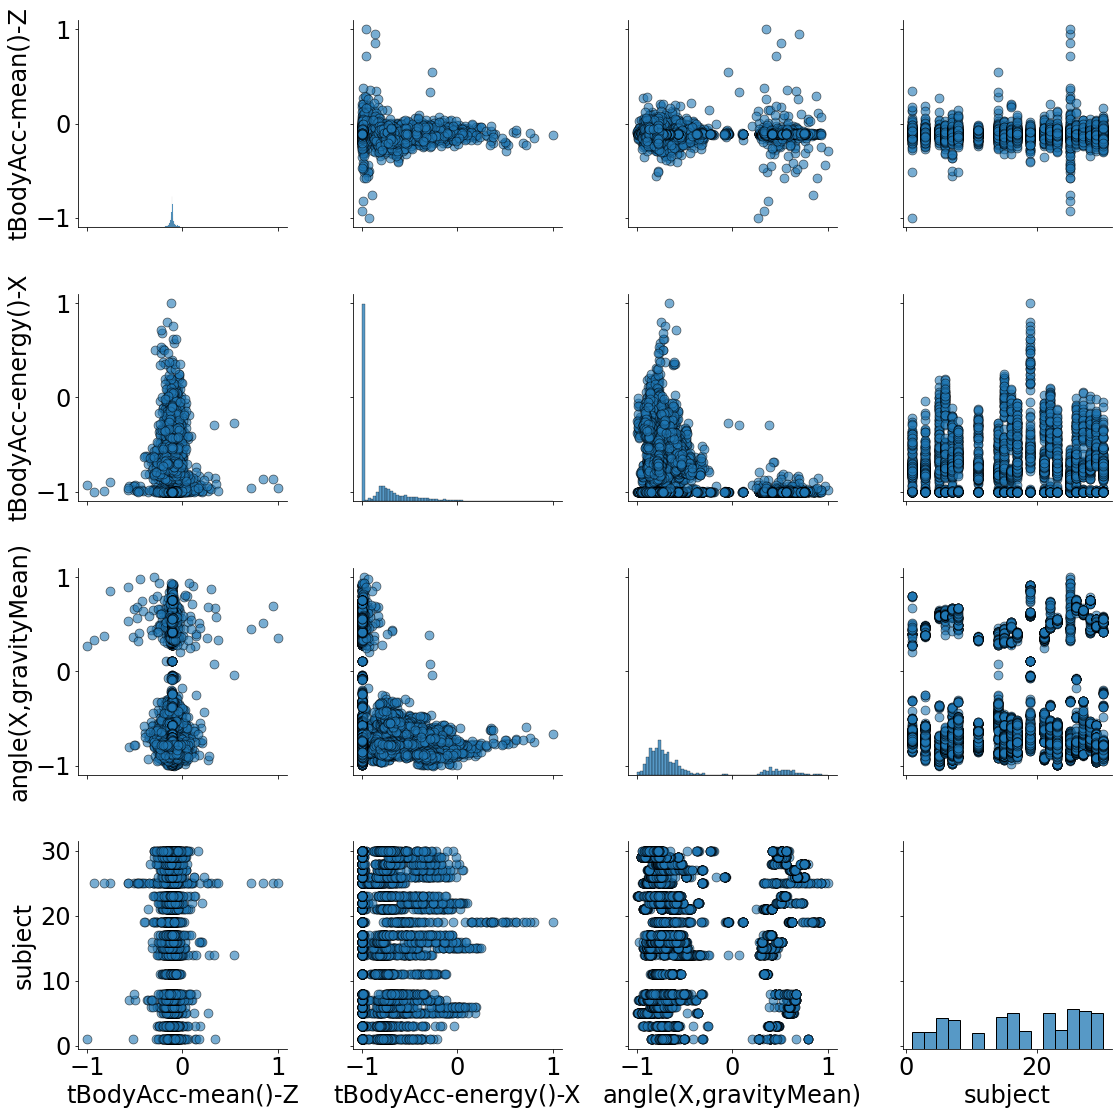

In [24]:
#pairplot of some of the variables along with activity and subject

plot = sns.pairplot(train_data[['tBodyAcc-mean()-Z','tBodyAcc-energy()-X','angle(X,gravityMean)','subject',]],plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

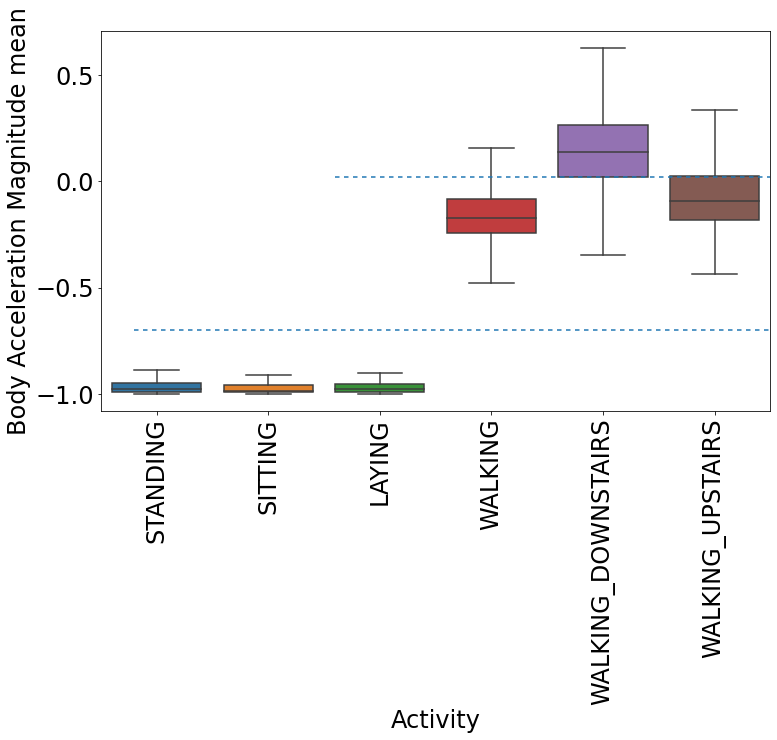

In [25]:
#The insights obtained through density plots can be represented using Box plots.
#Let's plot the boxplot of Body Accelartion Magnitude mean(tBodyAccMag-mean()) across all the six categories

plt.figure(figsize=(12,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train_data, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

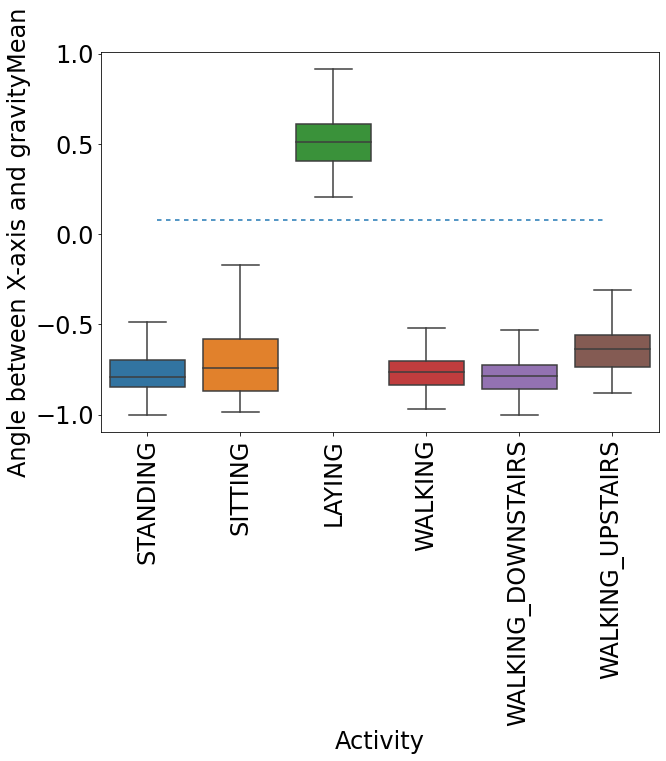

In [26]:
#From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.

plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_data, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.xticks(rotation = 90)

#### t-SNE Plot

Using **t-SNE** data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

In [27]:
from sklearn.manifold import TSNE

In [28]:
X_for_tsne = train_data.drop(['subject', 'Activity'], axis=1)

In [29]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.546s...
[t-SNE] Computed neighbors for 7352 samples in 48.871s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.123062
[t-SNE] KL divergence after 1000 iterations: 1.282848


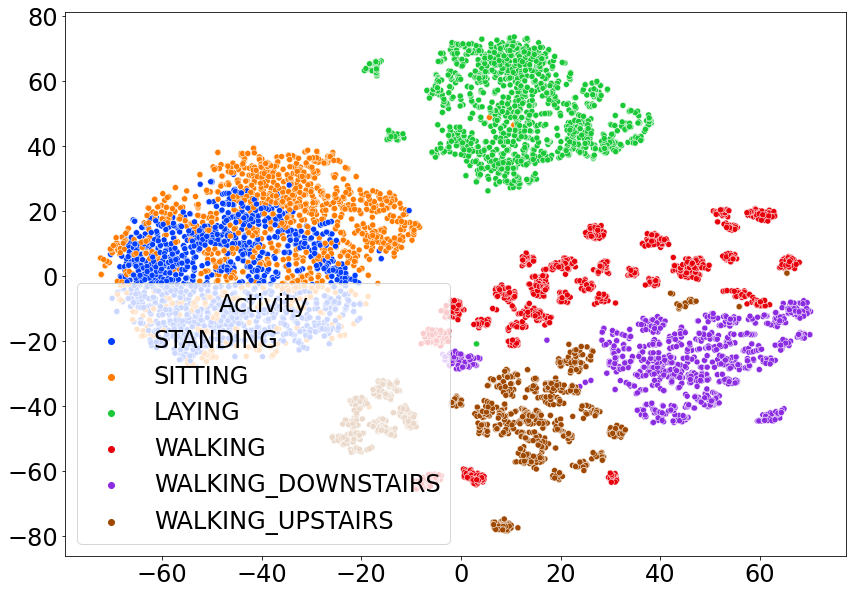

In [30]:
plt.figure(figsize=(14,10))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train_data["Activity"],palette="bright")

### Data Prepration 

In [31]:
#Converting the Activity variable records from categorical to numerical using a temp variable in both test and train data
#Train data
temp_train = []
for i in train_data.Activity:
    if i == "WALKING": temp_train.append(0)
    if i == "WALKING_UPSTAIRS": temp_train.append(1)
    if i == "WALKING_DOWNSTAIRS": temp_train.append(2)
    if i == "SITTING": temp_train.append(3)
    if i == "STANDING": temp_train.append(4)
    if i == "LAYING": temp_train.append(5)
train_data["n_Activity"] = temp_train

#TEST data
temp_test = []
for i in test_data.Activity:
    if i == "WALKING": temp_test.append(0)
    if i == "WALKING_UPSTAIRS": temp_test.append(1)
    if i == "WALKING_DOWNSTAIRS": temp_test.append(2)
    if i == "SITTING": temp_test.append(3)
    if i == "STANDING": temp_test.append(4)
    if i == "LAYING": temp_test.append(5)
test_data["n_Activity"] = temp_test

In [32]:
#Dropping the Activity variable from both test and train datasets
test_data.drop(["Activity"] , axis = 1 , inplace = True)
train_data.drop(["Activity"] , axis = 1 , inplace = True)

In [33]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'n_Activity'],
      dtype='object', length=563)

In [34]:
test_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'n_Activity'],
      dtype='object', length=563)

In [35]:
#converting the datsets into X and y independent and dependent variables respectively
X_train = train_data.iloc[:,0:562]

X_test = test_data.iloc[:,0:562]

print(X_train.shape)
#print(X_test.shape)

(7352, 562)


In [36]:
y_train=train_data['n_Activity']
y_test=test_data['n_Activity']

print(y_train.shape)
print(y_test.shape)

(7352,)
(2947,)


In [37]:
#Using StandaradScalar to transform the data such that it has mean as 0 and deviation as 1
# NOte: we can sue MinMaxScalar as well
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)


scaled_train_data=scaler.transform(X_train)
scaled_test_data=scaler.transform(X_test)
scaled_train_data



array([[ 0.20064157, -0.0636826 , -0.41962845, ...,  0.40794614,
        -0.00756789, -1.8288513 ],
       [ 0.05594788,  0.03148567, -0.25390836, ...,  0.40911698,
         0.00787517, -1.8288513 ],
       [ 0.07351535, -0.04341648, -0.07629468, ...,  0.4102883 ,
         0.02650234, -1.8288513 ],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ...,  0.64059683,
         0.34870928,  1.4025149 ],
       [ 0.21586648, -0.02812252, -0.86770988, ...,  0.63147758,
         0.29327564,  1.4025149 ],
       [ 1.09620157,  0.12919873, -1.67268082, ...,  0.63274259,
         0.33396081,  1.4025149 ]])

### Reducing the features - PCA

Reduction is features is required because the number of too many features present in the data. PCA is one of the method to reduce the features. 

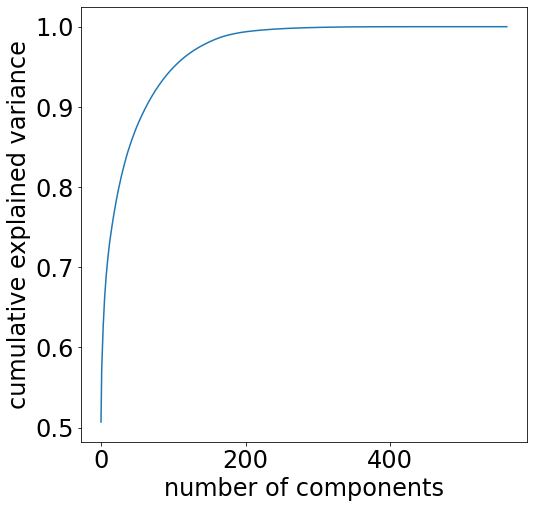

In [38]:
# Choosing the number of components

from sklearn.decomposition import PCA

pca = PCA().fit(scaled_train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [39]:
# Increase in variance flattens after 200 components. number of components = 200

In [40]:
#Doing Principle composite analysis(PCA) to reduce to the dimensionality which inturn helps in avoiding overfitting

from sklearn.decomposition import PCA
p_c_a= PCA(n_components=200)
p_c_a.fit(scaled_train_data)


x_pca=p_c_a.transform(scaled_train_data)
x_test_pca=p_c_a.transform(scaled_test_data)

In [41]:
print(scaled_train_data.shape)
print(x_pca.shape)

(7352, 562)
(7352, 200)


## Statistical algorithms on PCA results

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


#### Logistic regression

In [43]:
#Logistic regression
clf_Logistic = LogisticRegression().fit(x_pca, y_train)
prediction_lr = clf_Logistic.predict(x_test_pca)
accuracy_score(y_test, prediction_lr)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_score(y_test, prediction_lr)*100))

Logistic Regression accuracy: 94.12962334577536%


#### Support Vector Classifier

In [44]:
# Support Vector Classifier

clf = SVC().fit(x_pca, y_train)
prediction = clf.predict(x_test_pca)
accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

Support Vector Classifier accuracy: 95.04580929759076%


### Tree based, Ensemble and other ML Algorithms

#### Decision tree

In [45]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt=dt_model.predict(X_test)
print('Decision tree Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

Decision tree Classifier accuracy: 95.04580929759076%


#### Random Forest

In [46]:
# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))


Random Forest Classifier accuracy: 92.56871394638615%


#### XGBoost

In [47]:
#XGBoost

model = XGBClassifier(n_jobs=2) # using two processors 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prop = model.predict_proba(X_test)
predictions=y_pred.copy()
print('Random Forest Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

Random Forest Classifier accuracy: 92.56871394638615%


#### K Nearest Neighbors

In [48]:
# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

K Nearest Neighbors Classifier accuracy: 80.79402782490669%


### Deep learning Algorithms

#### ANN

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [50]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(50 ,  kernel_initializer = 'he_uniform',activation='relu',input_dim = 562))

In [51]:
# Adding the second hidden layer
classifier.add(Dense(55, kernel_initializer = 'he_uniform',activation='relu'))

In [52]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [53]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [54]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: -2082.2338 - accuracy: 0.1439 - val_loss: -23589.9258 - val_accuracy: 0.1492
Epoch 2/10
493/493 [==============================] - 1s 2ms/step - loss: -45542.9415 - accuracy: 0.1381 - val_loss: -151751.8438 - val_accuracy: 0.1492
Epoch 3/10
493/493 [==============================] - 1s 2ms/step - loss: -204304.0091 - accuracy: 0.1467 - val_loss: -459234.5312 - val_accuracy: 0.1492
Epoch 4/10
493/493 [==============================] - 1s 2ms/step - loss: -554451.5232 - accuracy: 0.1381 - val_loss: -970964.7500 - val_accuracy: 0.1492
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: -1107666.2553 - accuracy: 0.1547 - val_loss: -1840584.7500 - val_accuracy: 0.1492
Epoch 6/10
493/493 [==============================] - 1s 2ms/step - loss: -2061781.0294 - accuracy: 0.1471 - val_loss: -3125615.7500 - val_accuracy: 0.1492
Epoch 7/10
493/493 [==============================] - 1s 2ms/step - loss: -3

### Hyper Parameter tuning - ANN

In [55]:
#Hyper parameter tuning for knowing what exact number of input neurons and output neurons gives max accuracy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units =6 , kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grids = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grids,cv=5,n_jobs=5,verbose=2)

In [56]:
grid_result=grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done  60 out of  60 | elapsed:  3.6min finished


[0.9192083716392517,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': (45, 30, 15)}]

### Hyper Parameter tuning - SVM

In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [100, 50, 20, 1, 0.1]
}

selector = GridSearchCV(SVC(), parameters, scoring='accuracy',n_jobs=5,verbose=2) # we only care about accuracy here
selector.fit(X_train, y_train)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed: 12.6min finished


Best parameter set found:
{'C': 1, 'kernel': 'linear'}
Detailed grid scores:
0.931 (+/-0.055) for {'C': 100, 'kernel': 'linear'}

0.888 (+/-0.105) for {'C': 100, 'kernel': 'rbf'}

0.889 (+/-0.096) for {'C': 100, 'kernel': 'poly'}

0.216 (+/-0.150) for {'C': 100, 'kernel': 'sigmoid'}

0.931 (+/-0.055) for {'C': 50, 'kernel': 'linear'}

0.888 (+/-0.105) for {'C': 50, 'kernel': 'rbf'}

0.892 (+/-0.093) for {'C': 50, 'kernel': 'poly'}

0.215 (+/-0.149) for {'C': 50, 'kernel': 'sigmoid'}

0.933 (+/-0.056) for {'C': 20, 'kernel': 'linear'}

0.888 (+/-0.098) for {'C': 20, 'kernel': 'rbf'}

0.895 (+/-0.088) for {'C': 20, 'kernel': 'poly'}

0.221 (+/-0.145) for {'C': 20, 'kernel': 'sigmoid'}

0.936 (+/-0.056) for {'C': 1, 'kernel': 'linear'}

0.885 (+/-0.052) for {'C': 1, 'kernel': 'rbf'}

0.866 (+/-0.205) for {'C': 1, 'kernel': 'poly'}

0.221 (+/-0.163) for {'C': 1, 'kernel': 'sigmoid'}

0.936 (+/-0.054) for {'C': 0.1, 'kernel': 'linear'}

0.801 (+/-0.149) for {'C': 0.1, 'kernel': 'rbf'}

0.76

In [58]:
# Best parameter set found:
# {'C': 1, 'kernel': 'linear'}

### Algorithm Comparison 

In [59]:
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(7), 
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    XGBClassifier()
]

In [60]:
names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df

,Score
Model,
DecisionTreeClassifier,0.859518
KNeighborsClassifier,0.806583
SVC,0.930777
LogisticRegression,0.952494
RandomForestClassifier,0.926026
XGBClassifier,0.938921


### More Evaluation Parameters

Text(0.5, 1.0, 'Confussion Matrix')

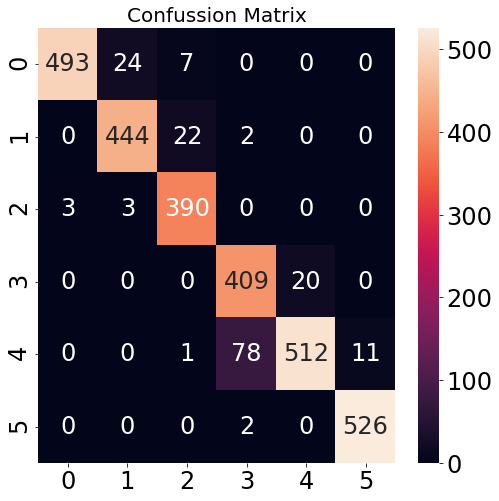

In [61]:
# confussion matrix
cm = confusion_matrix(prediction_lr, y_test)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)  

In [62]:
# Clasification Report
cr = classification_report(y_test, prediction_lr)
 
print("Classification report >>> \n", cr)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       496
           1       0.95      0.94      0.95       471
           2       0.98      0.93      0.96       420
           3       0.95      0.83      0.89       491
           4       0.85      0.96      0.90       532
           5       1.00      0.98      0.99       537

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



In [63]:
#Dump the logistic model in local

from sklearn.externals import joblib
import pickle

joblib.dump(clf_Logistic, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']